In [1]:
import torch
import torch.nn as nn

EMBED_DIM = 64
NUM_HEADS = 2
BATCH_SIZE = 256
SEQ_LENGTH = 11

torch.manual_seed(42) # for reproducibility

multihead_attn = nn.MultiheadAttention(embed_dim=EMBED_DIM, num_heads=NUM_HEADS, batch_first=True)

nn.Transformer()


print("Multi-head Attention Configuration:")
print(multihead_attn)

# some dummy data
query = torch.randn(BATCH_SIZE, SEQ_LENGTH , EMBED_DIM)
key = torch.randn(BATCH_SIZE, SEQ_LENGTH , EMBED_DIM)
value = torch.randn(BATCH_SIZE, SEQ_LENGTH , EMBED_DIM)

print("Query Shape: ", query.shape, " Key Shape: ", key.shape, " Value Shape: ", value.shape)

# forward pass
attn_output, attn_output_weights = multihead_attn(query, key, value)



/scratch4/levans/tth-network/MLenv/lib64/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Multi-head Attention Configuration:
MultiheadAttention(
  (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
)
Query Shape:  torch.Size([256, 11, 64])  Key Shape:  torch.Size([256, 11, 64])  Value Shape:  torch.Size([256, 11, 64])


In [2]:
print(f"Query shape: {query.shape}")
print(f"Key shape: {key.shape}")
print(f"Value shape: {value.shape}")
print(f"Attention output shape: {attn_output.shape}")
print(f"Attention weights shape: {attn_output_weights.shape}") # (B, S, S)

# some attention weights
print(f"Sample attention weights: {attn_output_weights[0, :5, :5]}")

Query shape: torch.Size([256, 11, 64])
Key shape: torch.Size([256, 11, 64])
Value shape: torch.Size([256, 11, 64])
Attention output shape: torch.Size([256, 11, 64])
Attention weights shape: torch.Size([256, 11, 11])
Sample attention weights: tensor([[0.1284, 0.1327, 0.1276, 0.0787, 0.0452],
        [0.0894, 0.1170, 0.1094, 0.1035, 0.1059],
        [0.1933, 0.0842, 0.0500, 0.0317, 0.0747],
        [0.0417, 0.0713, 0.0869, 0.1168, 0.1442],
        [0.0737, 0.1015, 0.0851, 0.1086, 0.0683]], grad_fn=<SliceBackward0>)


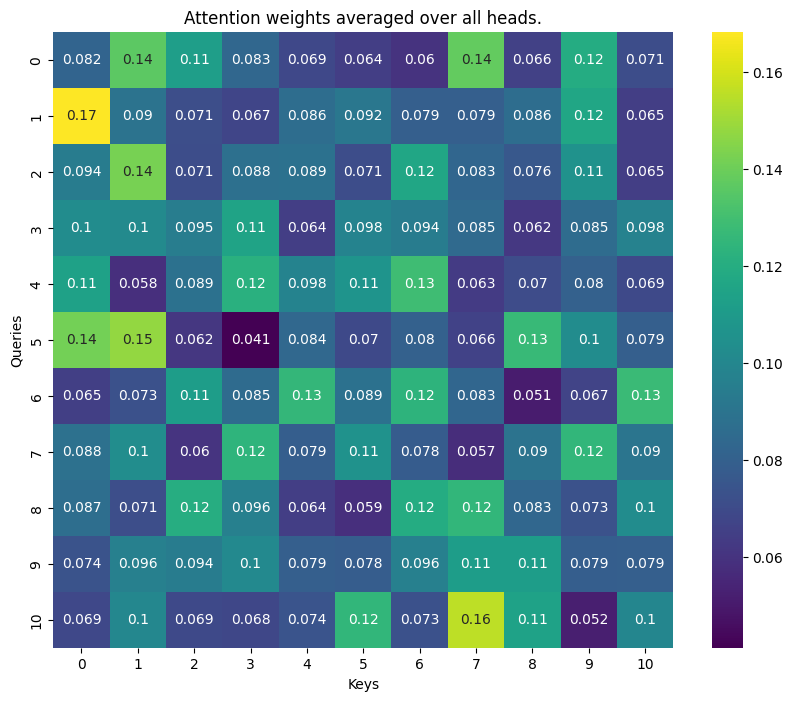

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# use the attention weights from the first sequence in the batch
sequence_index = 1
attention_weights_seq = attn_output_weights[sequence_index].detach().cpu().numpy()

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights_seq, cmap='viridis', annot=True)
plt.title(f'Attention weights averaged over all heads.')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()

# each row of the attention weights should sum to 1
# each cell shows the the attention weights of the correpsonding query-key pair, telling us how much attention the model
# is paying to the key when generating the query
